In [1]:
#text clsutering project

In [2]:
import nltk
nltk.download('punkt')#to download punctuations
nltk.download("stopwords")#to download stopwords
nltk.download("wordnet")  #to download lemmatizers
from nltk.corpus import gutenberg 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanikaushik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanikaushik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/himanikaushik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import math
import pandas as pd
import numpy as np
import re

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from urllib import request

<font size="4">**Importing and Preprocessing Data**</font>

In [7]:
#combining all URLs of books 
BooksURLs = ["https://www.gutenberg.org/files/24654/24654-8.txt" ,
             "https://www.gutenberg.org/files/27785/27785-8.txt" ,
             "https://www.gutenberg.org/files/14558/14558.txt" ,
             "https://www.gutenberg.org/files/2609/2609-0.txt" ,
             "https://www.gutenberg.org/files/28247/28247-8.txt"]

In [8]:
#making list of book names and label for every book
BooksNames = ["Chaldea",
              "A Book About Lawyers",
              "EBook of Darwinism",
              "The Vicomte de Bragelonne",
              "A Popular History of Astronomy During the Nineteenth Century"]
BooksLabels = ["a", "b" ,"c", "d" , "e"]

In [9]:
#making list of book authors
BooksAuthors = ["Zénaïde A. Ragozin",
                "John Cordy",
                "Alfred Russel Wallace",
                "Alexandre Dumas, Père",
                "Agnes M. (Agnes Mary) Clerke"]

In [10]:
Books=[]

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/himanikaushik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
from urllib import request

for URL  in BooksURLs :
  response = request.urlopen(URL)
  raw = response.read().decode('utf8' , errors = 'replace')
  wordsList= re.findall(r"[a-zA-Z]{3,}", raw)  #performing lemmetization
  lemmatizer = WordNetLemmatizer()
  lemmitizedWords =[]
  for i in wordsList:
    words = i.lower()
    word = lemmatizer.lemmatize(words)
    if word not in set(stopwords.words('english')): #checking if word is not in stopwords
      lemmitizedWords.append(str(word))
  Books.append(lemmitizedWords)

In [13]:
#Partitioning every book into 200 partitions and have 150 words in each partition

BooksWords = []  #combining all words together
#for loop to get book             
for i in Books:
  l = i[0:(math.floor(len(i)/150)) * 150]
  BooksWords.append(l)
#combining all lists of the words in a single dataframe
result = pd.DataFrame()
for i in range(len(BooksWords)):
    df = {}
    list_of_partitions =  [BooksWords[i][x:x+150] for x in range(0, len(BooksWords[i]), 150)]
    df['index'] = i
    df['Author_of_Book']= BooksAuthors[i]
    df['Title_of_Book']= BooksNames[i] 
    df['Label_of_Book'] = BooksLabels[i]
    df['PartitionsList'] = list_of_partitions 
    data = pd.DataFrame(df)
    
    for i in range(len(data)):
      data["PartitionsList"][i] = " ".join(data["PartitionsList"][i])
    final_result = data[:200]
    result = result.append(final_result)

result = shuffle(result)

/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_40525/242775553.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PartitionsList"][i] = " ".join(data["PartitionsList"][i])
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_40525/242775553.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final_result)
/var/folders/hl/rqh079pj18lfp9br87scnj8m0000gn/T/ipykernel_40525/242775553.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PartitionsList"][i] = " ".join(data["Partition

In [14]:
result.head(5)

,index,Author_of_Book,Title_of_Book,Label_of_Book,PartitionsList
199,3,"Alexandre Dumas, Père",The Vicomte de Bragelonne,d,tell monk declared favor liberty rump parliame...
124,1,John Cordy,A Book About Lawyers,b,noticed parliamentary report bearing date nove...
52,1,John Cordy,A Book About Lawyers,b,curavit omni musices genere doctam reddidit an...
144,4,Agnes M. (Agnes Mary) Clerke,A Popular History of Astronomy During the Nine...,e,substantial existence even two first remained ...
1,1,John Cordy,A Book About Lawyers,b,good queen viii rejected address cicero upon t...


In [15]:
result.describe()

,index
count,1000.000000
mean,2.000000
std,1.414921
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 199 to 191
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1000 non-null   int64 
 1   Author_of_Book  1000 non-null   object
 2   Title_of_Book   1000 non-null   object
 3   Label_of_Book   1000 non-null   object
 4   PartitionsList  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 46.9+ KB


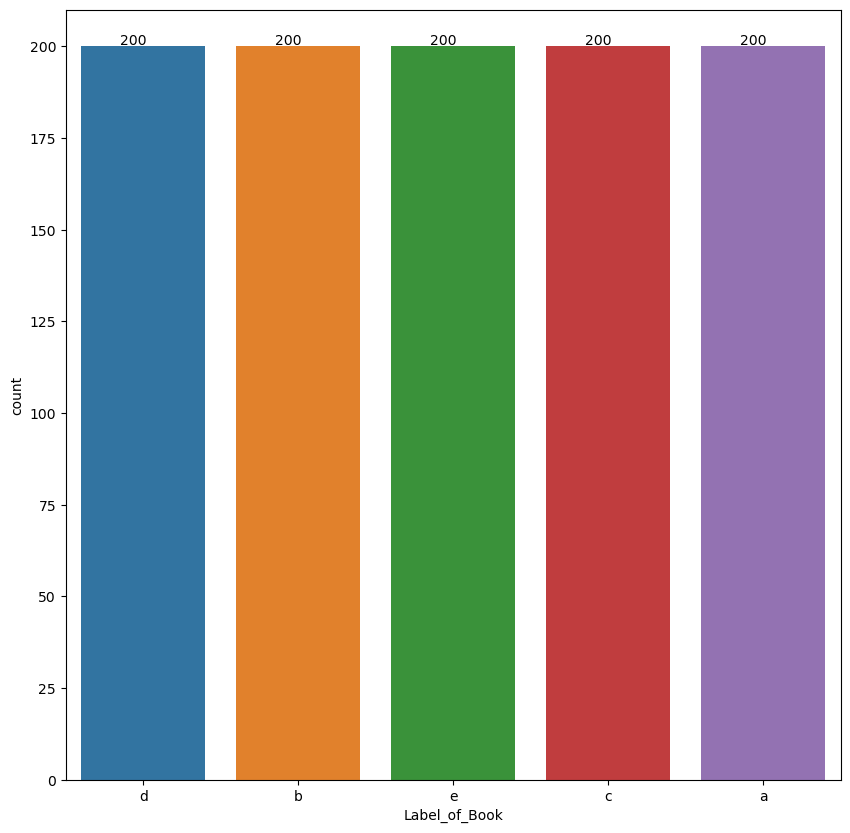

In [17]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x=result["Label_of_Book"],  data=result, order = result["Label_of_Book"].value_counts().index )
for p, label in zip(ax.patches, result["Label_of_Book"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

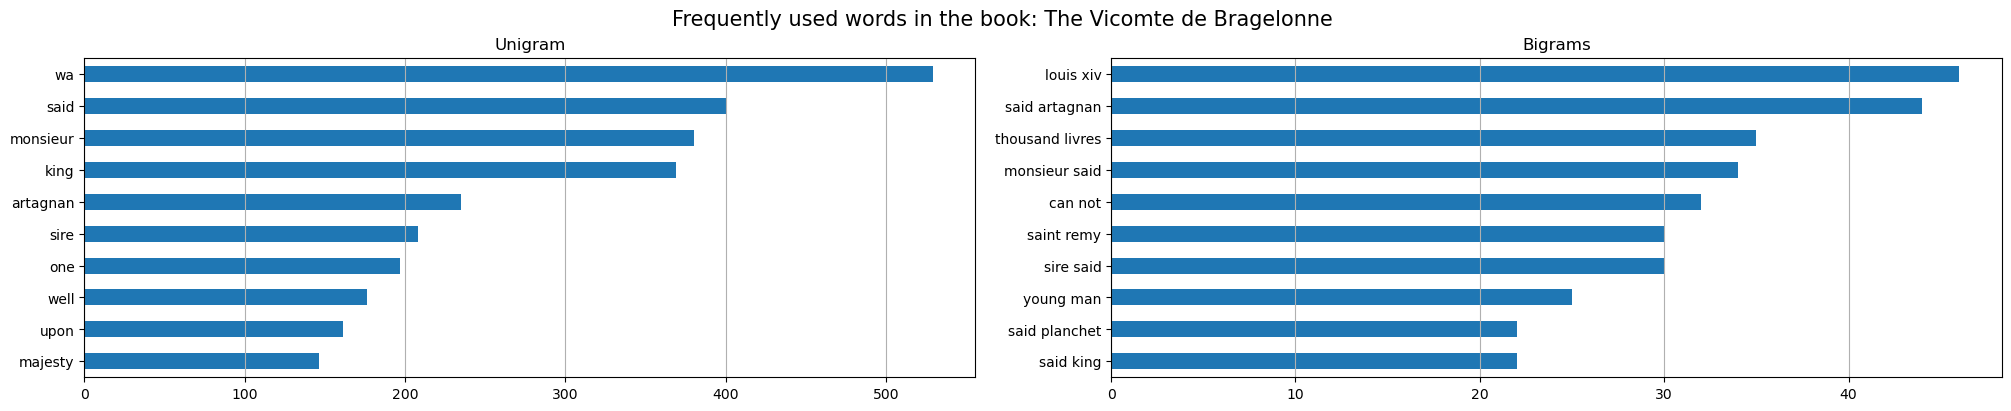

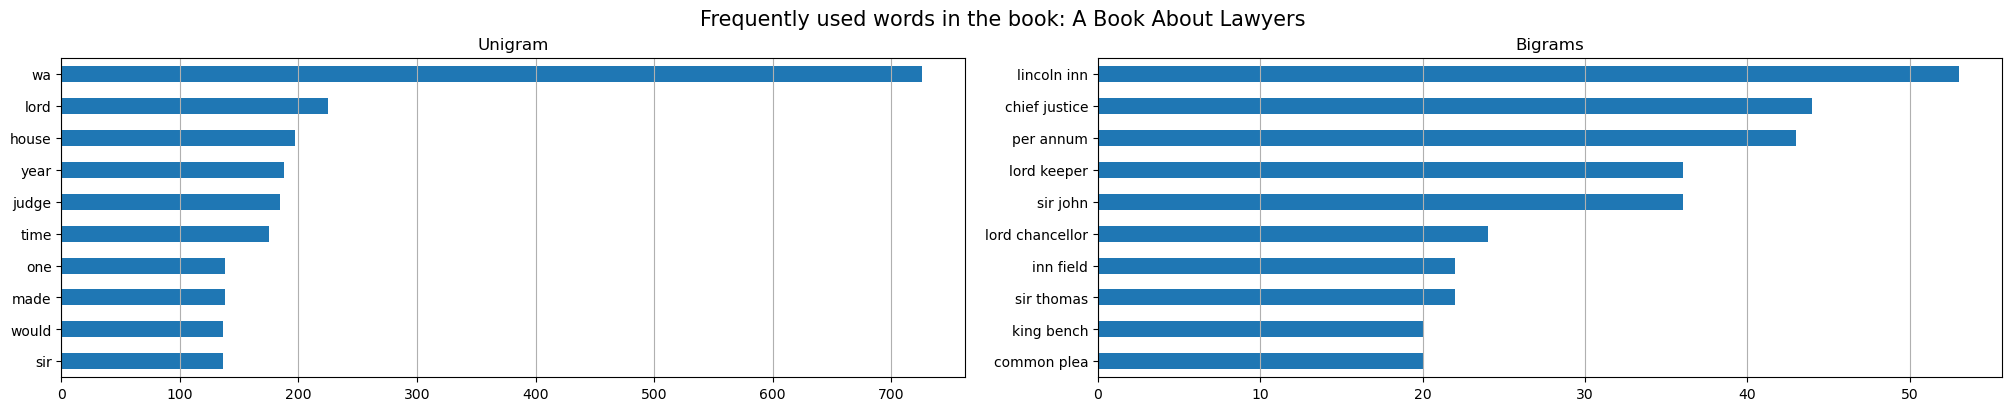

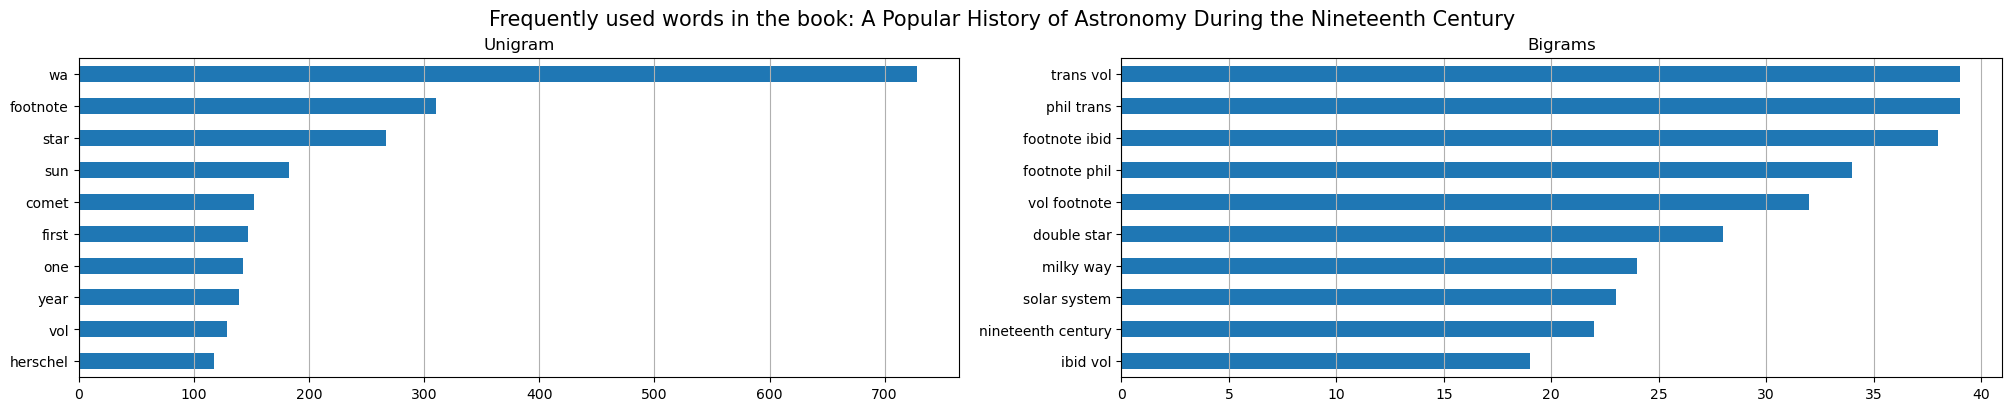

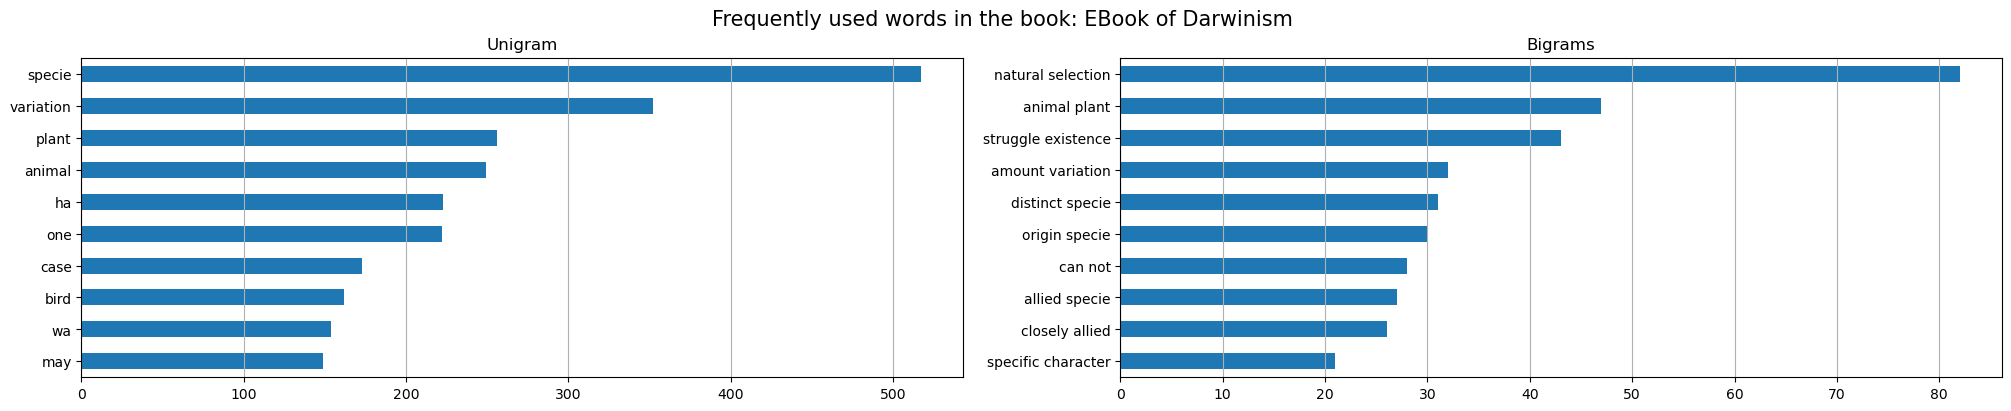

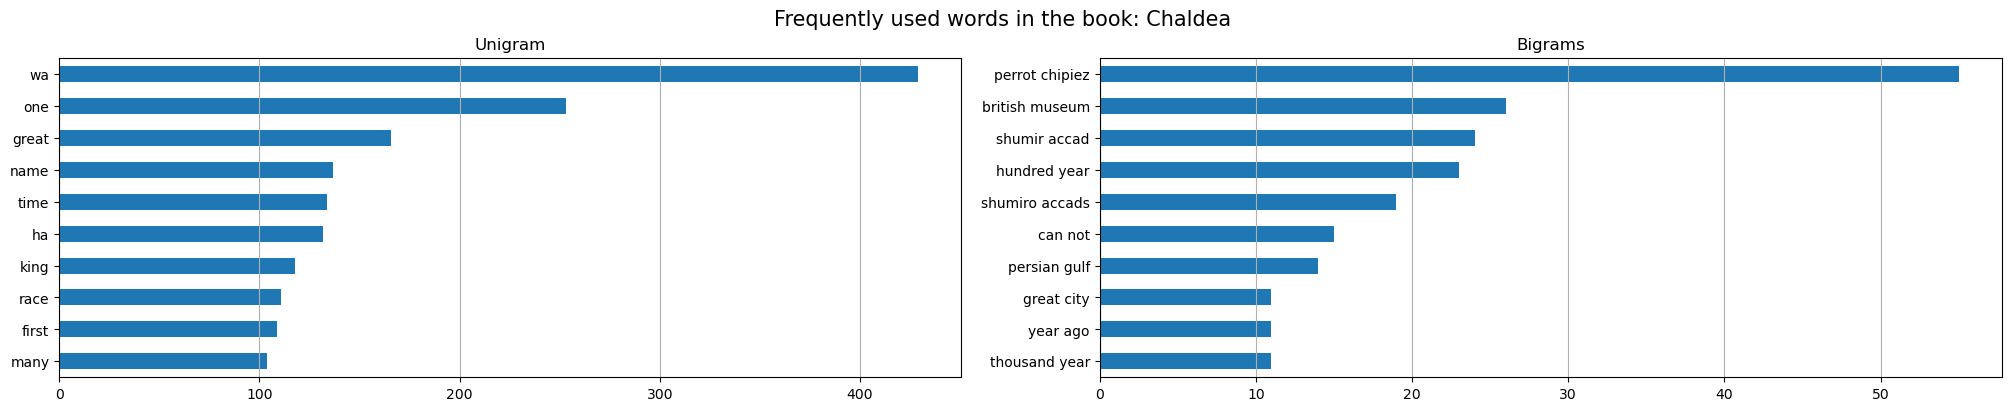

In [18]:
top= 10
for label in result['Title_of_Book'].unique():
    corpus = result[result["Title_of_Book"]==label]["PartitionsList"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize=(20, 4))
    fig.suptitle(f"Frequently used words in the book: {label} ", fontsize=15)

    #to draw the unigram gragh
    dic_words_freq = nltk.FreqDist(lst_tokens)
    result_unigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_unigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigram", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    
    #to draw the bigram graph
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    result_bigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_bigram["Word"] = result_bigram["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    result_bigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

In [19]:
#pip install wordcloud


 50 Frequently used words in the book: The Vicomte de Bragelonne



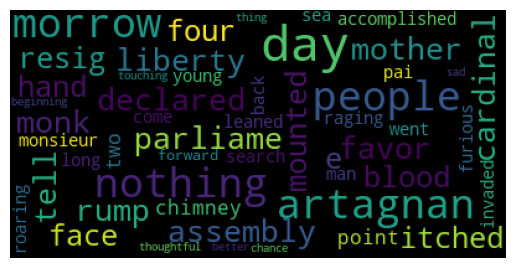


 50 Frequently used words in the book: A Book About Lawyers



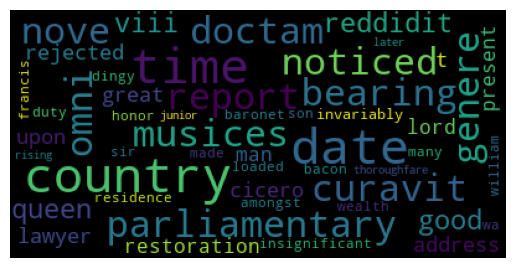


 50 Frequently used words in the book: A Popular History of Astronomy During the Nineteenth Century



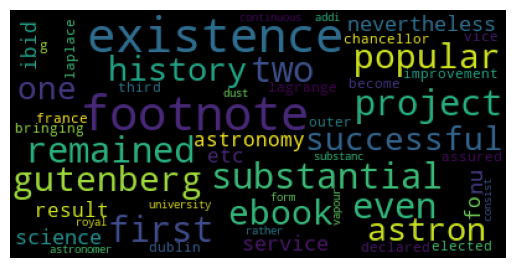


 50 Frequently used words in the book: EBook of Darwinism



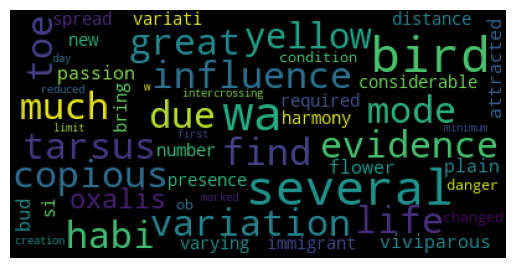


 50 Frequently used words in the book: Chaldea



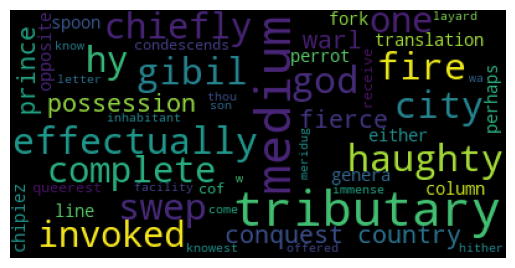

In [20]:
import wordcloud 
import string
 
for n in result['Title_of_Book'].unique():
  books = result[result["Title_of_Book"]==n]["PartitionsList"]
 
  print(f"\n 50 Frequently used words in the book: {n}\n")
  WordCloudGragh = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=40)
  WordCloudGragh = WordCloudGragh.generate(str(books))
  plt.axis('off')
  plt.imshow(WordCloudGragh, cmap=None)
  plt.show()

<font size="4">**Transforming Data**</font>

<font size="4">**1. BOW Transformation**</font>

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
countVector= CountVectorizer()

In [23]:
BOWVector = countVector.fit_transform(result['PartitionsList'])

In [24]:
BOW = pd.DataFrame(BOWVector.toarray(), columns=countVector.get_feature_names())

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
BOW

,aaron,abandon,abandoned,abandoning,abandonment,abated,abb,abbe,abbey,abbott,...,zodiacal,zonal,zone,zool,zoologique,zoologist,zoology,zur,zwischen,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font size="4">**2. TF-IDF Transformation**</font>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer = TfidfVectorizer()

In [28]:
TFIDF = vectorizer.fit_transform(result['PartitionsList'])

In [29]:
TFIDF_Vector = pd.DataFrame(TFIDF.toarray(), columns=vectorizer.get_feature_names())

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
TFIDF_Vector

,aaron,abandon,abandoned,abandoning,abandonment,abated,abb,abbe,abbey,abbott,...,zodiacal,zonal,zone,zool,zoologique,zoologist,zoology,zur,zwischen,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font size="4">**3. LDA Transformation**</font>

In [31]:
#pip install gensim

In [32]:
import gensim
from gensim import models
from gensim import corpora, models, similarities
from sklearn.decomposition import LatentDirichletAllocation

In [33]:
wordsDictionary = corpora.Dictionary(result['PartitionsList'].str.split())
corpus = [wordsDictionary.doc2bow(wordDic) for wordDic in result['PartitionsList'].str.split()]

In [34]:
#creating the LDA model
LDA_Model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = wordsDictionary,
                                           num_topics = 150,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100, 
                                           passes = 10, 
                                           alpha = 'auto',
                                           per_word_topics = True)
predictionWords = LDA_Model.inference(corpus)

In [35]:
#!pip install pyLDAvis

In [36]:
# create a dictionary of the book words
wordsDictionary = corpora.Dictionary(result['PartitionsList'].str.split())
corpus = [wordsDictionary.doc2bow(wordDic) for wordDic in result['PartitionsList'].str.split()]

In [37]:
LDAModel = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = wordsDictionary,
                                           num_topics = 5,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100, 
                                           passes = 10, 
                                           alpha = 'auto',
                                           per_word_topics = True)
PredictedWords = LDAModel.inference(corpus)

In [38]:
#pip install pyLDAvis

In [87]:
import pyLDAvis
import pyLDAvis.gensim_models as genisvis
pyLDAvis.enable_notebook()
visualization = genisvis.prepare(LDAModel, corpus, wordsDictionary)
visualization

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/hi

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.153495 -0.187256       1        1  24.003422
3     -0.082261  0.012242       2        1  24.000497
1     -0.194705 -0.035135       3        1  20.099480
0      0.149015  0.161992       4        1  16.026767
2     -0.025545  0.048157       5        1  15.869834, topic_info=          Term         Freq        Total Category  logprob  loglift
1268    specie   479.000000   479.000000  Default  30.0000  30.0000
83        said   496.000000   496.000000  Default  29.0000  29.0000
851   monsieur   379.000000   379.000000  Default  28.0000  28.0000
378   footnote   376.000000   376.000000  Default  27.0000  27.0000
106         wa  2361.000000  2361.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
396       must    75.368498   306.015864   Topic5  -5.7553   0.4395
159       king    81.140133   480.734152   Topic5  -5.6815   0.0616
33       first    78.288269   415.921478   Topic5  -5.7172   0.1707
131      could    72.246771   268.519643   Topic5  -5.7976   0.5279
1134      work    63.079422   183.943589   Topic5  -5.9332   0.7705

[330 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2633      5  0.978912     accad
3264      5  0.980584  accadian
1285      4  0.990826  advocate
3438      3  0.984286    allied
733       1  0.019072      also
...     ...       ...       ...
220       5  0.170571      year
1630      1  0.992929       yes
340       1  0.652319     young
340       3  0.138682     young
340       4  0.210591     young

[563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

In [40]:
LDA = pd.DataFrame(list(PredictedWords[0]), columns=['1', '2','3','4', '5'])

In [41]:
LDA['res'] = LDA.idxmax(axis = 1)

In [42]:
LDA.head()

,1,2,3,4,5,res
0,0.121710,6.297770,10.518360,41.755322,91.040962,5
1,128.704269,6.219258,0.131042,15.295912,0.270618,1
2,84.970520,0.204380,6.978431,27.358265,30.191488,1
3,3.745756,0.206495,0.131131,146.006546,0.268842,4
4,81.228470,1.564073,0.131100,51.285492,15.966647,1


In [43]:
PredictedWords

(array([[1.2170985e-01, 6.2977695e+00, 1.0518360e+01, 4.1755322e+01,
         9.1040962e+01],
        [1.2870427e+02, 6.2192578e+00, 1.3104180e-01, 1.5295912e+01,
         2.7061805e-01],
        [8.4970520e+01, 2.0437954e-01, 6.9784307e+00, 2.7358265e+01,
         3.0191488e+01],
        ...,
        [3.1825294e+00, 9.5775023e+00, 1.3119207e-01, 3.2911915e-01,
         1.3765221e+02],
        [1.2156795e-01, 3.0078484e+01, 1.3103145e-01, 1.2030704e+02,
         2.6176342e-01],
        [3.7553685e+00, 1.6282141e+01, 2.9358027e+01, 9.1212921e+01,
         1.0117374e+01]], dtype=float32),
 None)

<font size="4">**Clustering Algorithms**</font>

In [44]:
#TSNE is used to reduce the number of dimensions to a reasonable amount if the number of features is very high.
from sklearn.manifold import TSNE
def TSNEData(DesiredOutput):
  Tsna = TSNE(n_components= 2, random_state= 42)
  DataOfTSNE = Tsna.fit_transform(DesiredOutput) 
  return DataOfTSNE

<font size="4">**1. K-means Algorithm**</font>

In [45]:
from sklearn.cluster import KMeans
def BuildingKMeansModel(clusters, X_data):
  kMeansModel= KMeans(n_clusters= clusters, init='k-means++', random_state=0)
  Y_Prediction = kMeansModel.fit_predict(X_data)
  return kMeansModel, Y_Prediction

<font size="4">**2. Hierarchical clustering Algorithm**</font>

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
def BuildingHierarchicalClustering(clusters, X_data, title):
  plt.figure(figsize=(10, 7)) 
  plt.title(title) 
  dend= shc.dendrogram(shc.linkage(X_data, method='ward'))
  ag= AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')  
  Y_Prediction= ag.fit_predict(X_data)
  return ag, Y_Prediction

<font size="4">**Functions for Clustering Visualizations**</font>

In [47]:
from scipy.sparse import csr_matrix
from numpy import concatenate

In [48]:
def ClusteringVisualization(ClusteringModel, result, Y_Prediction, em=True):
  # centroids of kmeans cluster
  if em:
    centroids = np.empty(shape=(ClusteringModel.n_components, result.shape[1]))
  else:
    centroids = ClusteringModel.cluster_centers_

  # transform rows and centroids to dense return matrix
  matrix_data = csr_matrix(result)
  all_Data = concatenate((matrix_data.todense(), centroids))

  n_clusters = 5

  plt.scatter([all_Data[:-n_clusters, 0]], [all_Data[:-n_clusters, 1]], c=Y_Prediction, cmap=plt.cm.Paired, marker= 'x')
  plt.scatter([all_Data[-n_clusters:, 0]], [all_Data[-n_clusters:, 1]], marker= 'o')
  plt.show()

In [49]:
from collections import Counter
def CountingClusters(predictedClusters):
  clustersNumber = Counter(predictedClusters)
  plt.bar(clustersNumber.keys(), clustersNumber.values())

<font size="4">**Clustering algorithms on three transformations**</font>

<font size="4">**1. BOW and K-Means algorithm**</font>

In [50]:
DataOfBOW = TSNEData(BOW)

KMeansWithBOW, KMeansWithBOWPrediction = BuildingKMeansModel(5,DataOfBOW)

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [51]:
KMeansWithBOW.cluster_centers_.argsort()[:, ::-1]

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]])

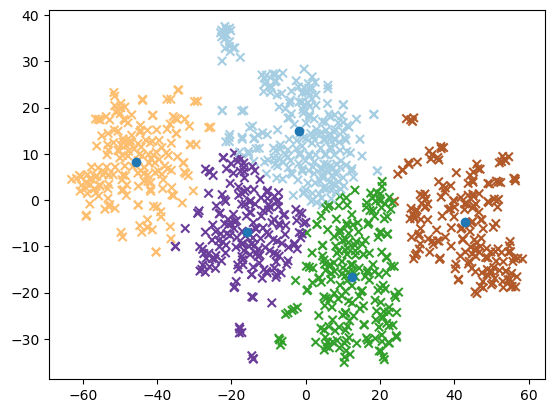

In [52]:
ClusteringVisualization(KMeansWithBOW, DataOfBOW, KMeansWithBOWPrediction,False)

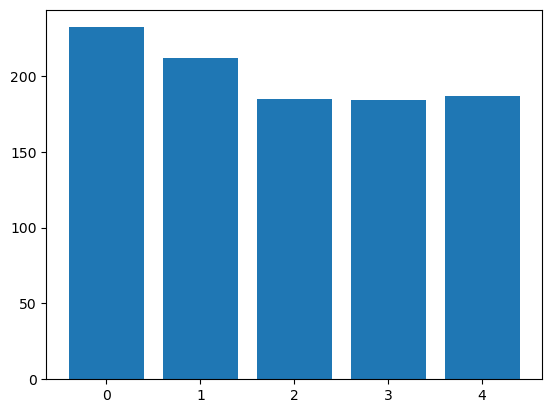

In [53]:
CountingClusters(KMeansWithBOWPrediction)

<font size="4">**2. BOW and Hierarchical clustering algorithm**</font>

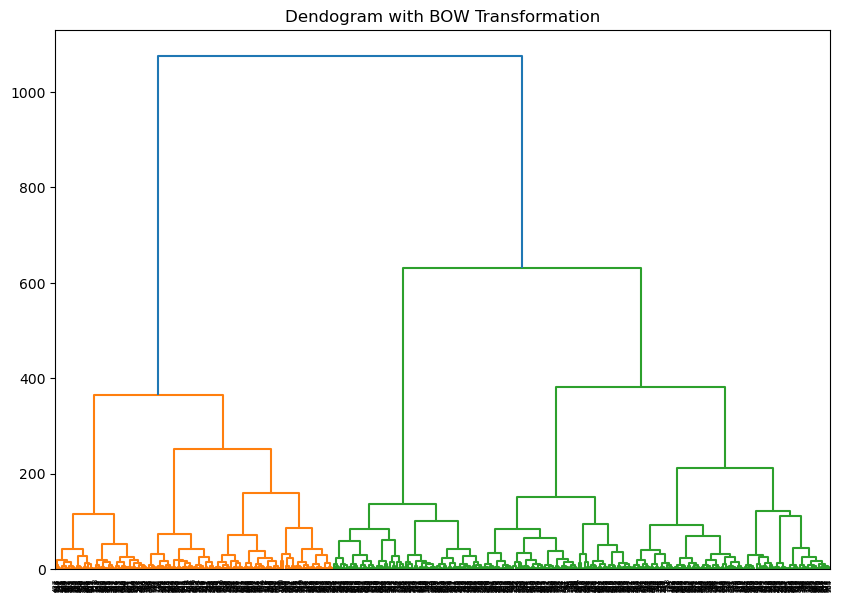

In [54]:
AgglomerativeClusteringWithBOW, AgglomerativeClusteringWithBOWPrediction= BuildingHierarchicalClustering(5, DataOfBOW,"Dendogram with BOW Transformation")

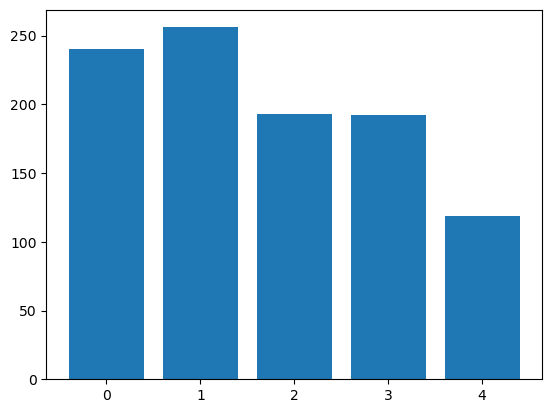

In [55]:
CountingClusters(AgglomerativeClusteringWithBOWPrediction)

<font size="4">**3. TF-IDF and K-Means algorithm**</font>

In [56]:
DataOfTFIDF = TSNEData(TFIDF_Vector)

KMeansWithTFIDF, KMeansWithTFIDFPrediction = BuildingKMeansModel(5,DataOfTFIDF)

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


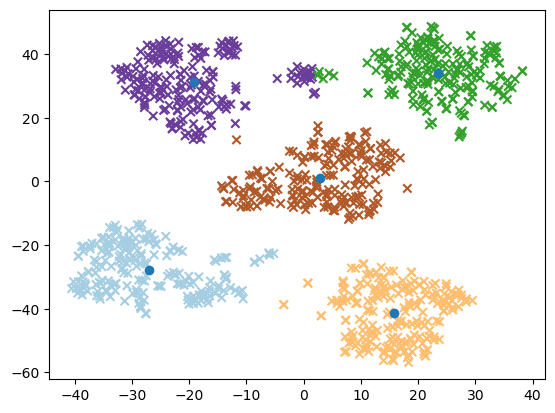

In [57]:
ClusteringVisualization(KMeansWithTFIDF, DataOfTFIDF, KMeansWithTFIDFPrediction,False)

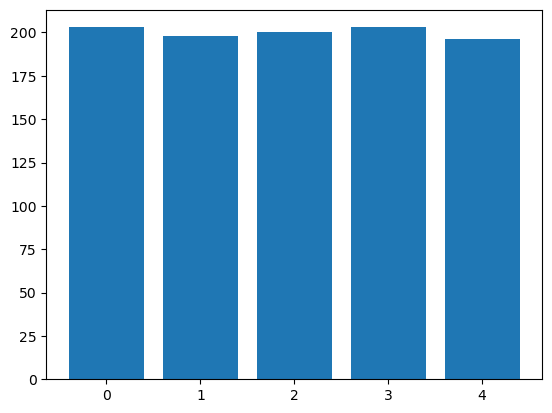

In [58]:
CountingClusters(KMeansWithTFIDFPrediction)

<font size="4">**4. TF-IDF and Hierarchical clustering algorithm**</font>

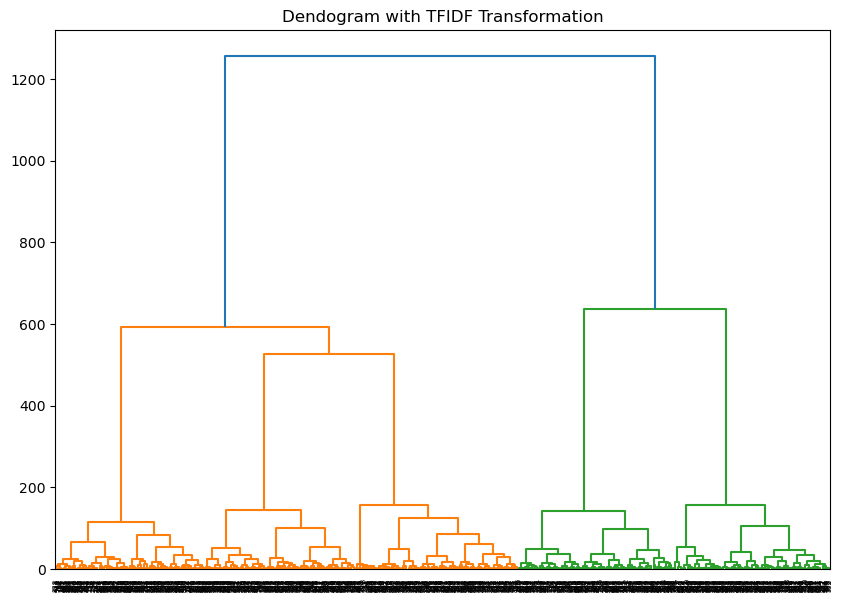

In [59]:
HierarchicalClusteringWithTFIDF, HierarchicalClusteringWithTFIDFPrediction= BuildingHierarchicalClustering(5, DataOfTFIDF,"Dendogram with TFIDF Transformation")

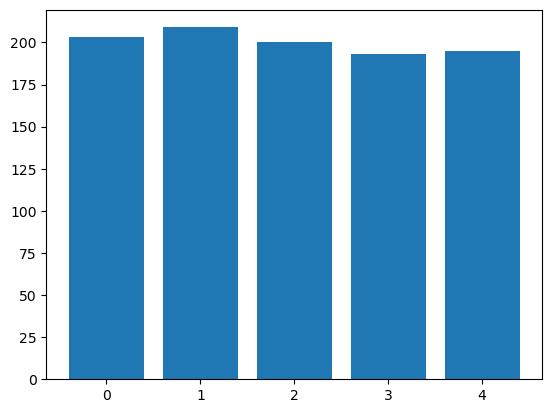

In [60]:
CountingClusters(HierarchicalClusteringWithTFIDFPrediction)

<font size="4">**5. LDA and K-Means algorithm**</font>

In [61]:
DataOfLDA = TSNEData(PredictedWords[0])

KMeansWithLDA, KMeansWithLDAPrediction = BuildingKMeansModel(5, DataOfLDA)

/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/himanikaushik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


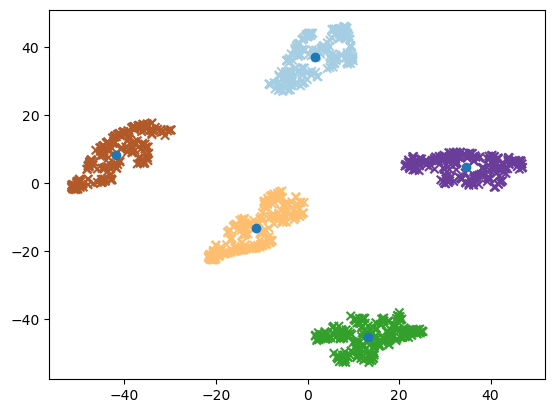

In [62]:
ClusteringVisualization(KMeansWithLDA, DataOfLDA, KMeansWithLDAPrediction,False)

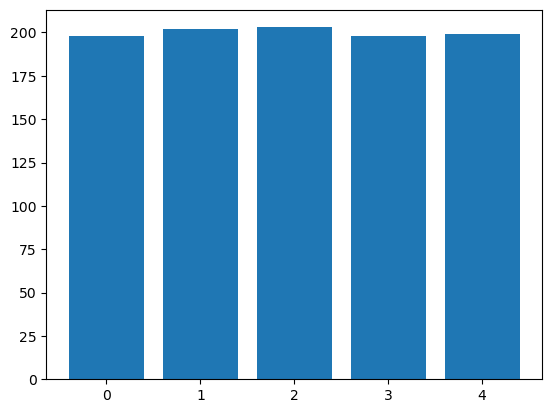

In [63]:
CountingClusters(KMeansWithLDAPrediction)

<font size="4">**6. LDA and Hierarchical clustering algorithm**</font>

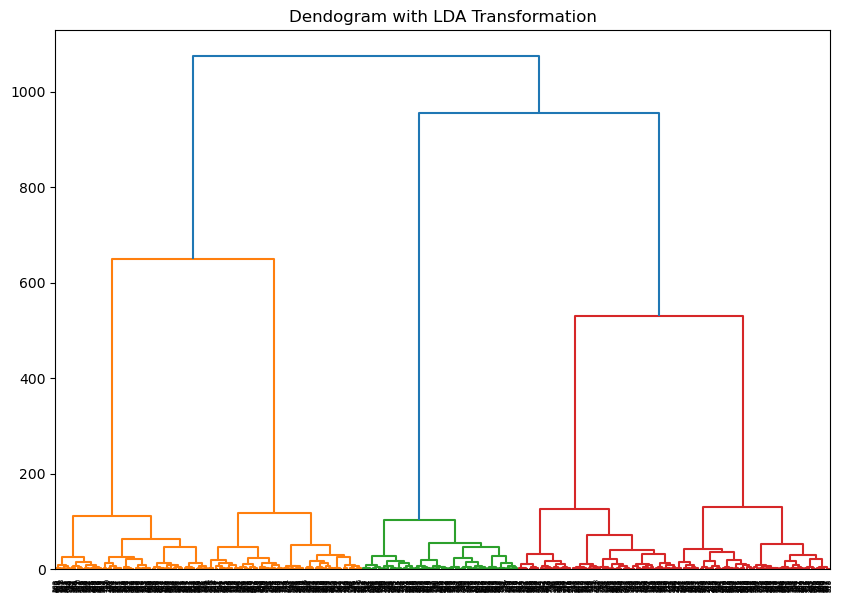

In [64]:
HierarchicalClusteringWithLDA, HierarchicalClusteringWithLDAPrediction= BuildingHierarchicalClustering(5, DataOfLDA, "Dendogram with LDA Transformation")

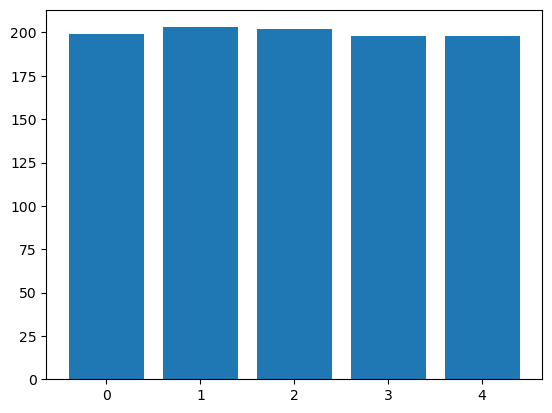

In [65]:
CountingClusters(HierarchicalClusteringWithLDAPrediction)

<font size="4">**V-Measure for Evaluating Clustering Performance against the true authors**</font>

<font size="4">**1. V-Measure for K-means clustering Models**</font>

In [66]:
from sklearn.metrics.cluster import v_measure_score
names = ["KMeans-BOW", "KMeans-TFIDF","KMeans-LDA","HC-BOW","HC-TFIDF","HC-LDA"]
v_scores = []
v_score_1 = v_measure_score(result['index'],KMeansWithBOWPrediction)
v_scores.append(v_score_1)
v_score_1

0.8236544799672482

In [67]:
v_score_2 = v_measure_score(result['index'],KMeansWithTFIDFPrediction)
v_scores.append(v_score_2)
v_score_2

0.9643312377840527

In [68]:
v_score_3 =v_measure_score(result['index'],KMeansWithLDAPrediction)
v_scores.append(v_score_3)
v_score_3

0.9571705626890978

<font size="4">**2. V-Measure for Hierarchical clustering Models**</font>

In [69]:
v_score_4 =v_measure_score(result['index'],AgglomerativeClusteringWithBOWPrediction)
v_scores.append(v_score_4)
v_score_4

0.7145291550150643

In [70]:
v_score_5 = v_measure_score(result['index'],HierarchicalClusteringWithTFIDFPrediction)
v_scores.append(v_score_5)
v_score_5

0.9473906244906256

In [71]:
v_score_6 = v_measure_score(result['index'],HierarchicalClusteringWithLDAPrediction)
v_scores.append(v_score_6)
v_score_6

0.957170562689098

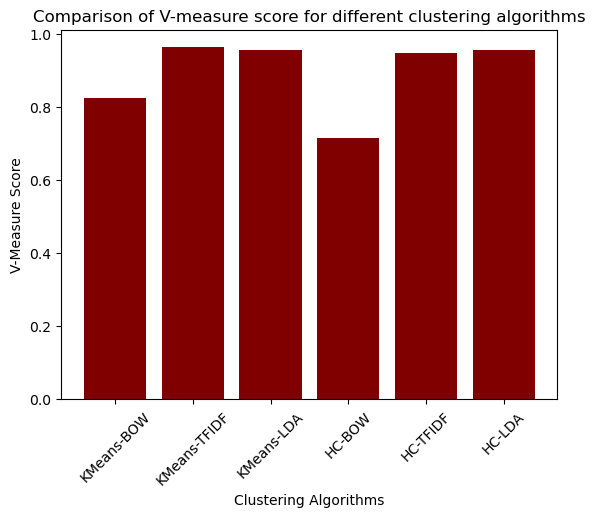

In [72]:
# Plotting a Bar Graph to compare the models
plt.bar(names, v_scores, color = 'maroon')

plt.xlabel('Clustering Algorithms')
plt.ylabel('V-Measure Score')
plt.title('Comparison of V-measure score for different clustering algorithms')
plt.xticks(rotation = 45)
plt.show()

<font size="4">**Silhouette score for Evaluating Clustering Performance against the true authors**</font>

In [73]:
from sklearn.metrics import silhouette_score
s_scores = []

<font size="4">**1. Silhouette score for K-Means clustering models**</font>

In [74]:
print("Silhouette Score of K-means With BOW Transformation:  {:.5f}".format(silhouette_score(DataOfBOW, KMeansWithBOWPrediction)))
print("Silhouette Score of K-means With TFIDF Transformation:  {:.5f}".format(silhouette_score(DataOfTFIDF, KMeansWithTFIDFPrediction)))
print("Silhouette Score of K-means With LDA Transformation:  {:.5f}".format(silhouette_score(DataOfLDA, KMeansWithLDAPrediction)))
s_scores.append(silhouette_score(DataOfBOW, KMeansWithBOWPrediction))
s_scores.append(silhouette_score(DataOfTFIDF, KMeansWithTFIDFPrediction))
s_scores.append(silhouette_score(DataOfLDA, KMeansWithLDAPrediction))
s_scores

Silhouette Score of K-means With BOW Transformation:  0.45821
Silhouette Score of K-means With TFIDF Transformation:  0.62636
Silhouette Score of K-means With LDA Transformation:  0.77112


[0.45820788, 0.6263563, 0.77111685]

<font size="4">**2. Silhouette score for Hierarchical clustering models**</font>

In [75]:
print("Silhouette Score of Hierarchical clustering With BOW Transformation:  {:.5f}".format(silhouette_score(DataOfBOW, AgglomerativeClusteringWithBOWPrediction)))
print("Silhouette Score of Hierarchical clustering With TFIDF Transformation:  {:.5f}".format(silhouette_score(DataOfTFIDF, HierarchicalClusteringWithTFIDFPrediction)))
print("Silhouette Score of Hierarchical clustering With LDA Transformation:  {:.5f}".format(silhouette_score(DataOfLDA, HierarchicalClusteringWithLDAPrediction)))
s_scores.append(silhouette_score(DataOfBOW, AgglomerativeClusteringWithBOWPrediction))
s_scores.append(silhouette_score(DataOfTFIDF, HierarchicalClusteringWithTFIDFPrediction))
s_scores.append(silhouette_score(DataOfLDA, HierarchicalClusteringWithLDAPrediction))
s_scores

Silhouette Score of Hierarchical clustering With BOW Transformation:  0.40858
Silhouette Score of Hierarchical clustering With TFIDF Transformation:  0.62583
Silhouette Score of Hierarchical clustering With LDA Transformation:  0.77112


[0.45820788, 0.6263563, 0.77111685, 0.40858248, 0.62583184, 0.77111685]

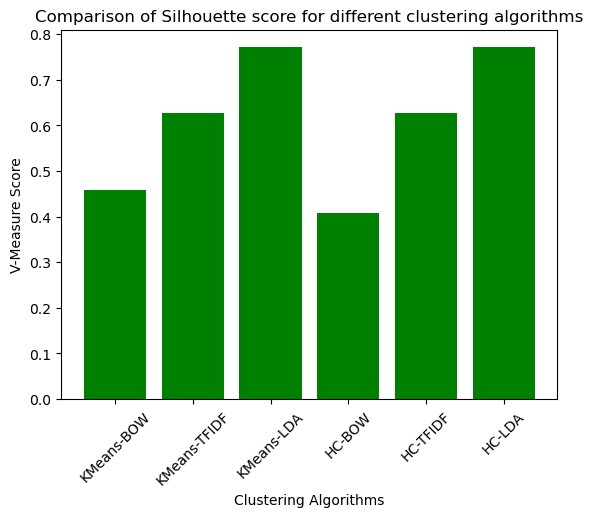

In [76]:
# Plotting a Bar Graph to compare the models
plt.bar(names, s_scores, color = 'green')

plt.xlabel('Clustering Algorithms')
plt.ylabel('V-Measure Score')
plt.title('Comparison of Silhouette score for different clustering algorithms')
plt.xticks(rotation = 45)
plt.show()

<font size="4">**Comparison between Silhouette scores using different K numbers on LDA transformed data**</font>

In [77]:
from sklearn.metrics import silhouette_score ,silhouette_samples 
import matplotlib.cm as cm

In [78]:
RangeOfClusters = [ 3, 4, 5, 6, 7, 8] 
SilhouetteScores = []

For NumOfClusters = 3 The average of the silhouette score is : 0.56309605 

For NumOfClusters = 4 The average of the silhouette score is : 0.66956854 

For NumOfClusters = 5 The average of the silhouette score is : 0.77111685 

For NumOfClusters = 6 The average of the silhouette score is : 0.7222523 

For NumOfClusters = 7 The average of the silhouette score is : 0.6795865 

For NumOfClusters = 8 The average of the silhouette score is : 0.62865674 



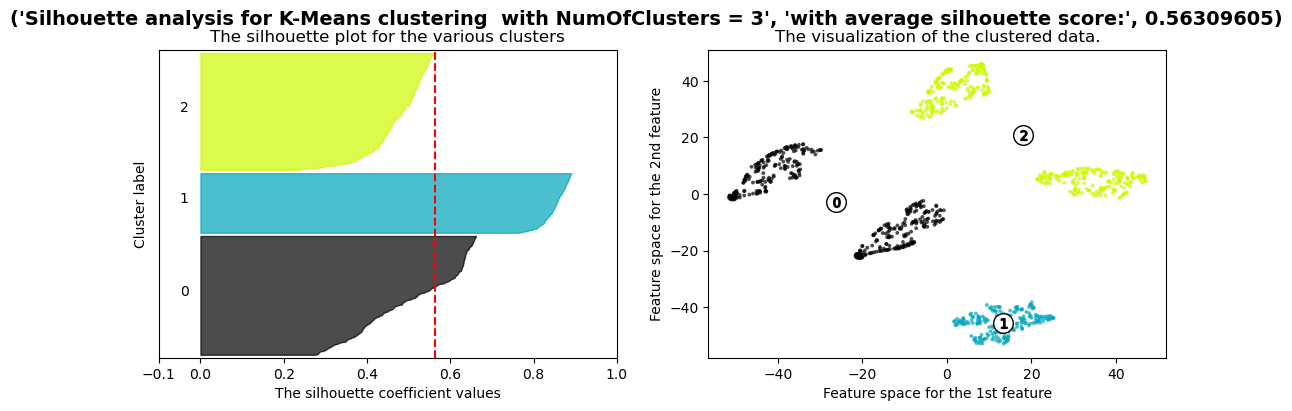

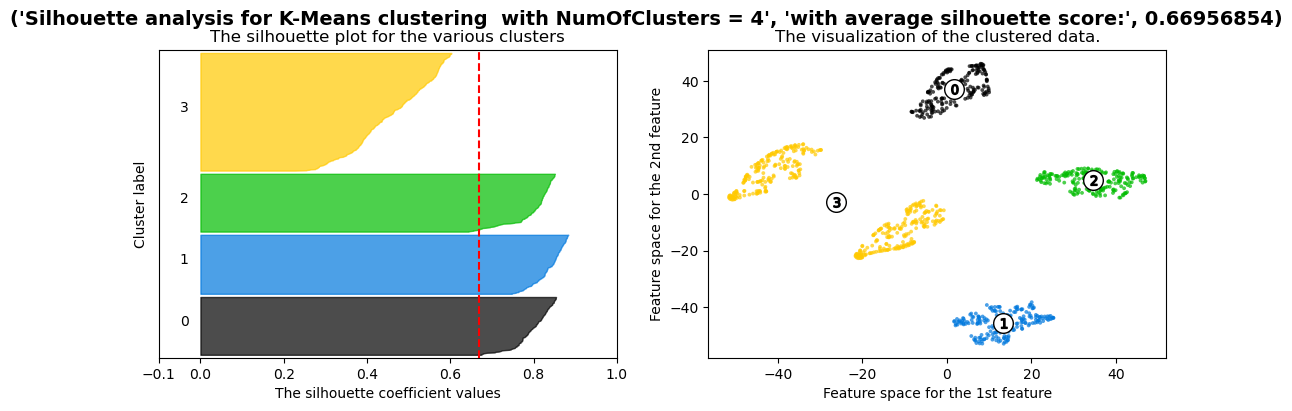

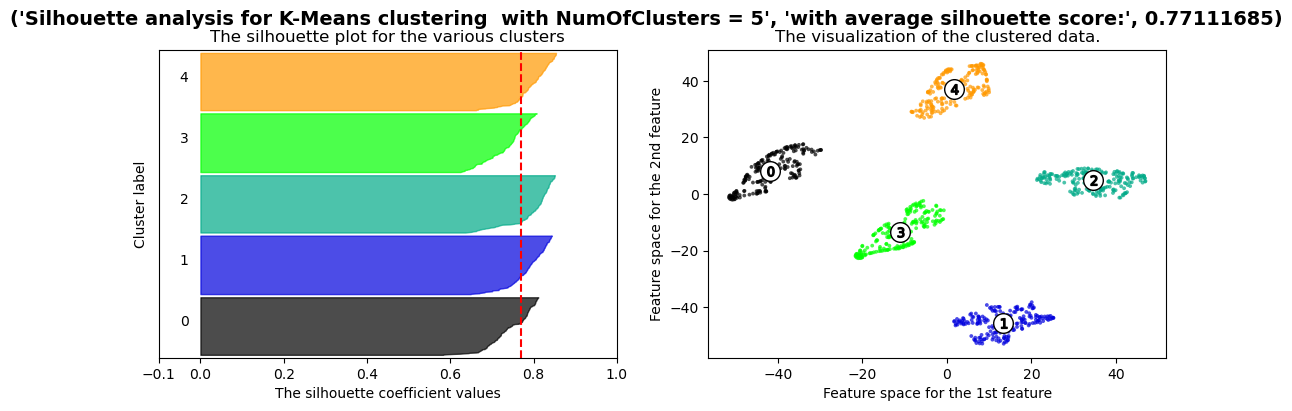

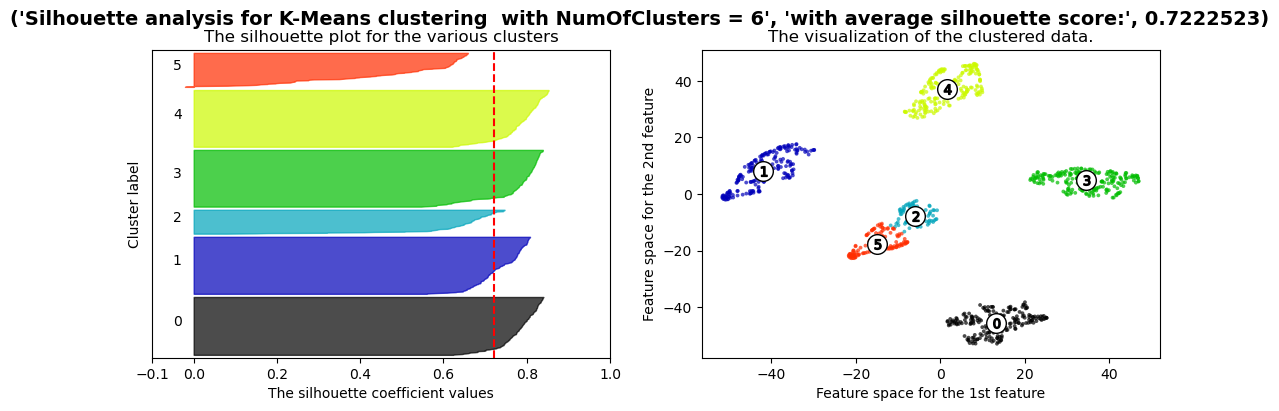

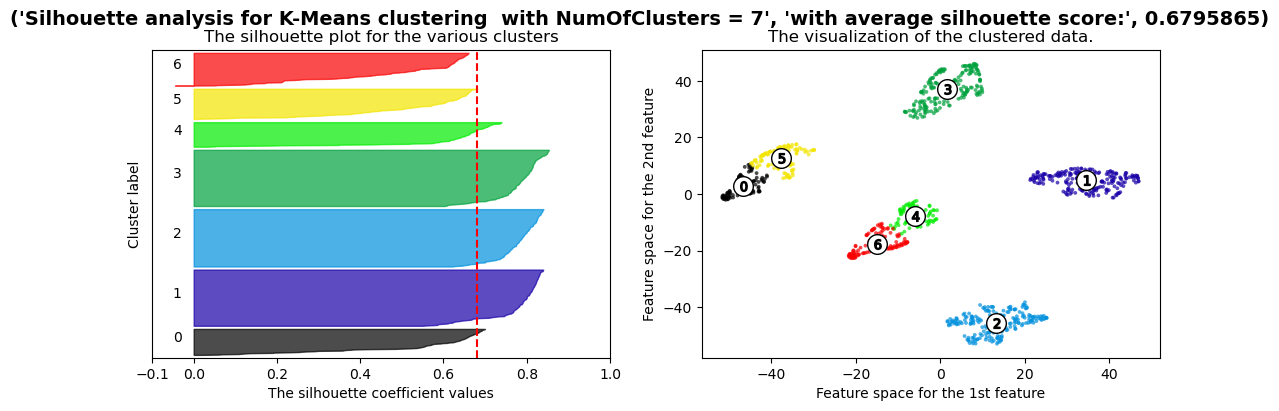

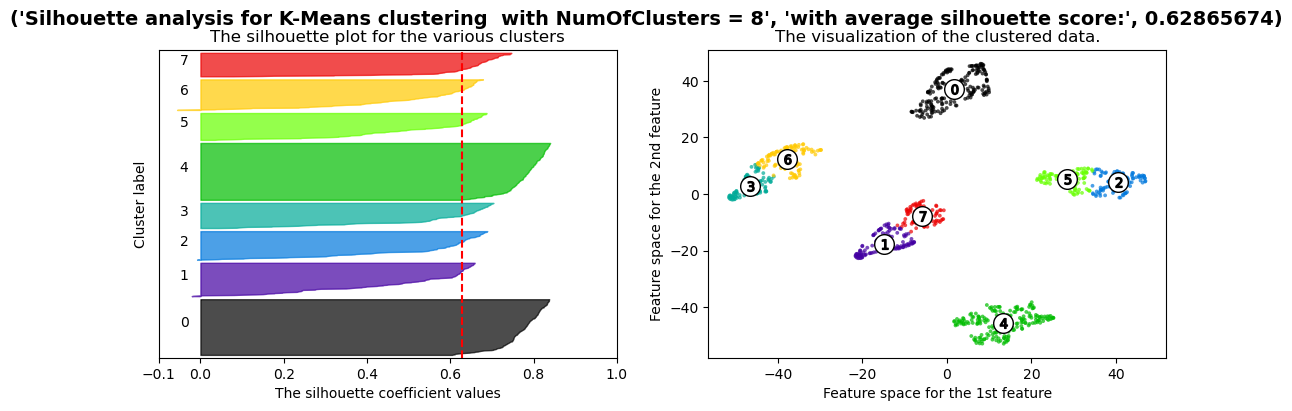

In [79]:

for NumOfClusters in RangeOfClusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 4)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(DataOfLDA) + (NumOfClusters + 1) * 10])
    
    clusters = KMeans(n_clusters=NumOfClusters, random_state=10)
    
    cluster_labels = clusters.fit_predict(DataOfLDA)
    AverageOfSilhouette = silhouette_score(DataOfLDA, cluster_labels)
    SilhouetteScores.append(AverageOfSilhouette)
    
    print("For NumOfClusters =", NumOfClusters, "The average of the silhouette score is :", AverageOfSilhouette ,"\n")
    
    SilhouetteValuesSamples = silhouette_samples(DataOfLDA, cluster_labels)
    y_lower = 10
    for i in range(NumOfClusters):
        SilhouetteValues = \
            SilhouetteValuesSamples[cluster_labels == i]
        
        SilhouetteValues.sort()
        ClusterSize = SilhouetteValues.shape[0]
        
        y_upper = y_lower + ClusterSize
        color = cm.nipy_spectral(float(i) / NumOfClusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, SilhouetteValues, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * ClusterSize, str(i))
        
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=AverageOfSilhouette, color="red", linestyle="--") 
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / NumOfClusters)
    ax2.scatter(DataOfLDA[:, 0], DataOfLDA[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusters.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k') 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for K-Means clustering  " "with NumOfClusters = %d" % NumOfClusters ,"with average silhouette score:", AverageOfSilhouette ), fontsize=14, fontweight='bold')
plt.show()

Following sources were used for more analysis:

https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6

https://builtin.com/data-science/tsne-python

https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

https://towardsdatascience.com/v-measure-an-homogeneous-and-complete-clustering-ab5b1823d0ad

https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111
